In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Carregando a base de dados
# Certifique-se que o arquivo creditcard.csv está na mesma pasta que este arquivo .ipynb
df = pd.read_csv('creditcard.csv')

# Verificando se carregou certo mostrando as 5 primeiras linhas
print("Base carregada com sucesso!")
display(df.head())

Base carregada com sucesso!


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


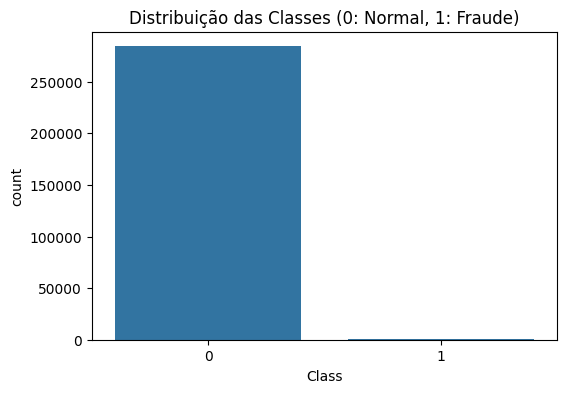

Transações Normais: 99.83%
Transações Fraudulentas: 0.17%

Quantidade máxima de valores nulos em uma coluna: 0


In [2]:
# 1. Visualização da distribuição das classes
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title('Distribuição das Classes (0: Normal, 1: Fraude)')
plt.show()

# Ver a porcentagem exata
contagem = df['Class'].value_counts(normalize=True) * 100
print(f"Transações Normais: {contagem[0]:.2f}%")
print(f"Transações Fraudulentas: {contagem[1]:.2f}%")

# 2. Verificação de valores nulos
nulos = df.isnull().sum().max()
print(f"\nQuantidade máxima de valores nulos em uma coluna: {nulos}")

In [3]:
# Contando duplicatas
print(f"Linhas duplicadas antes: {df.duplicated().sum()}")

# Removendo duplicatas
df.drop_duplicates(inplace=True)

print(f"Linhas duplicadas depois: {df.duplicated().sum()}")
print(f"Novo tamanho da base: {df.shape}")

Linhas duplicadas antes: 1081
Linhas duplicadas depois: 0
Novo tamanho da base: (283726, 31)


In [4]:
# Usando RobustScaler (bom para quando há muitos outliers)
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

# Removendo as colunas originais Time e Amount
df.drop(['Time','Amount'], axis=1, inplace=True)

# Colocando as novas colunas escaladas no início (opcional, só para organizar)
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']
df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

print("Normalização concluída. Veja as primeiras linhas:")
display(df.head())

Normalização concluída. Veja as primeiras linhas:


,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.774718,-0.995290,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.268530,-0.995290,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.959811,-0.995279,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.411487,-0.995279,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.667362,-0.995267,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


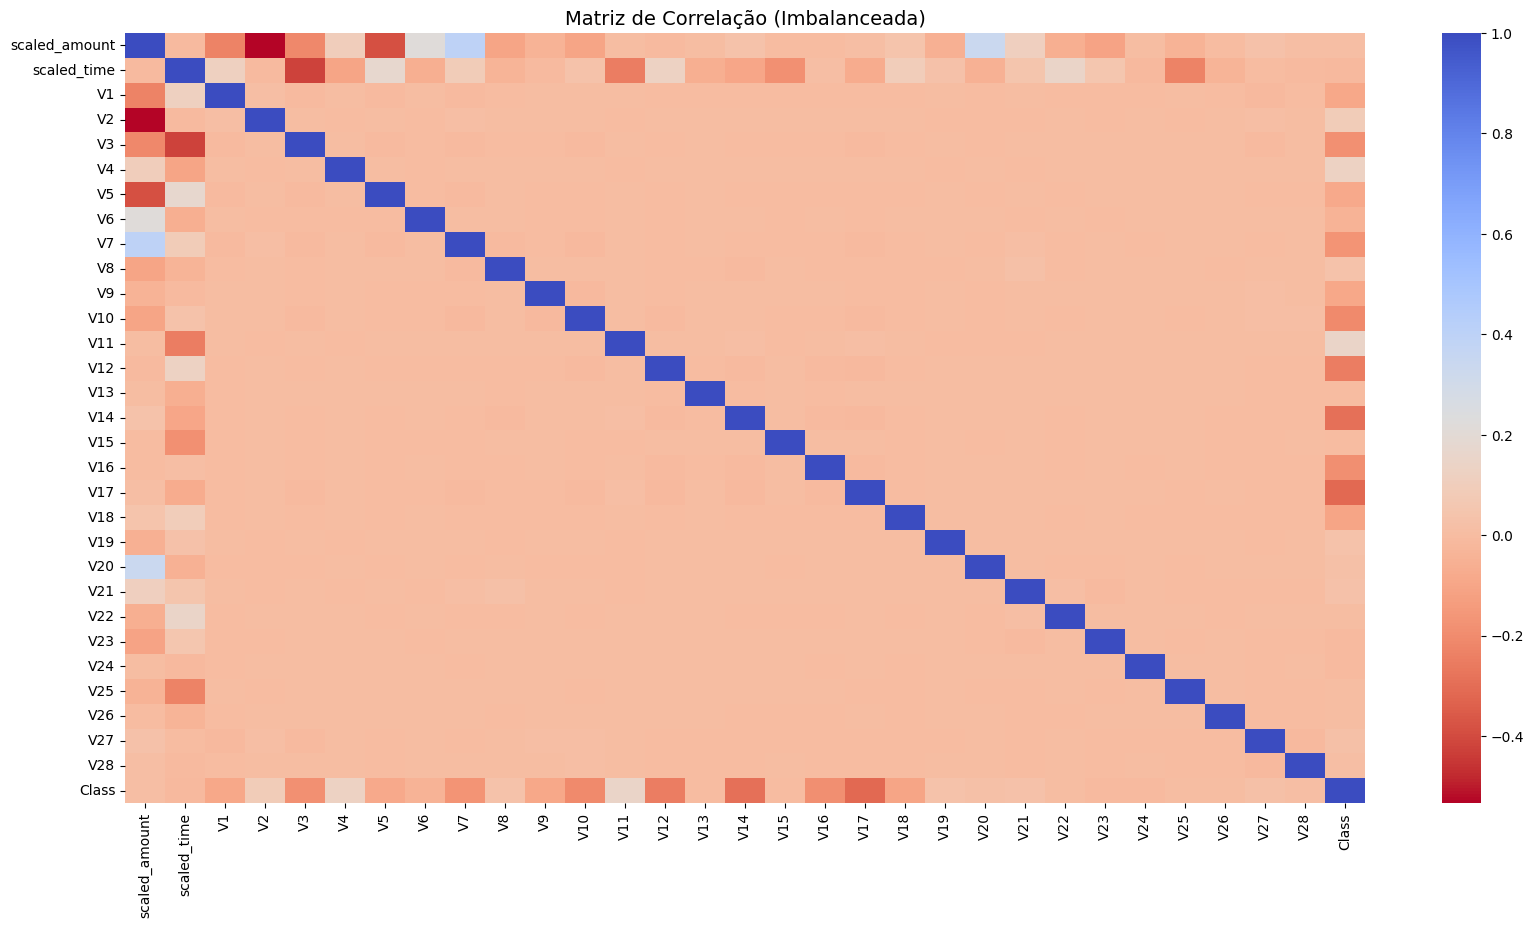

In [5]:
# Matriz de correlação
plt.figure(figsize=(20,10))
# Vamos ver a correlação de tudo com a Classe
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20})
plt.title("Matriz de Correlação (Imbalanceada)", fontsize=14)
plt.show()

In [6]:
# Separando X (dados) e y (alvo)
X = df.drop('Class', axis=1)
y = df['Class']

# 1. Divisão Treino e Teste (Estratificada para manter a proporção de fraudes)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 2. Aplicando SMOTE apenas no Treino
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("--- ANTES DO BALANCEAMENTO (Treino) ---")
print(y_train.value_counts())

print("\n--- DEPOIS DO SMOTE (Treino) ---")
print(y_train_resampled.value_counts())

print("\n--- DADOS DE TESTE (Não mexemos neles!) ---")
print(y_test.value_counts())

--- ANTES DO BALANCEAMENTO (Treino) ---
Class
0    226602
1       378
Name: count, dtype: int64

--- DEPOIS DO SMOTE (Treino) ---
Class
0    226602
1    226602
Name: count, dtype: int64

--- DADOS DE TESTE (Não mexemos neles!) ---
Class
0    56651
1       95
Name: count, dtype: int64


--- MODELO A: Sem Balanceamento ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.85      0.58      0.69        95

    accuracy                           1.00     56746
   macro avg       0.92      0.79      0.84     56746
weighted avg       1.00      1.00      1.00     56746


--- MODELO B: Com Balanceamento (SMOTE) ---
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56651
           1       0.05      0.87      0.10        95

    accuracy                           0.97     56746
   macro avg       0.53      0.92      0.54     56746
weighted avg       1.00      0.97      0.99     56746



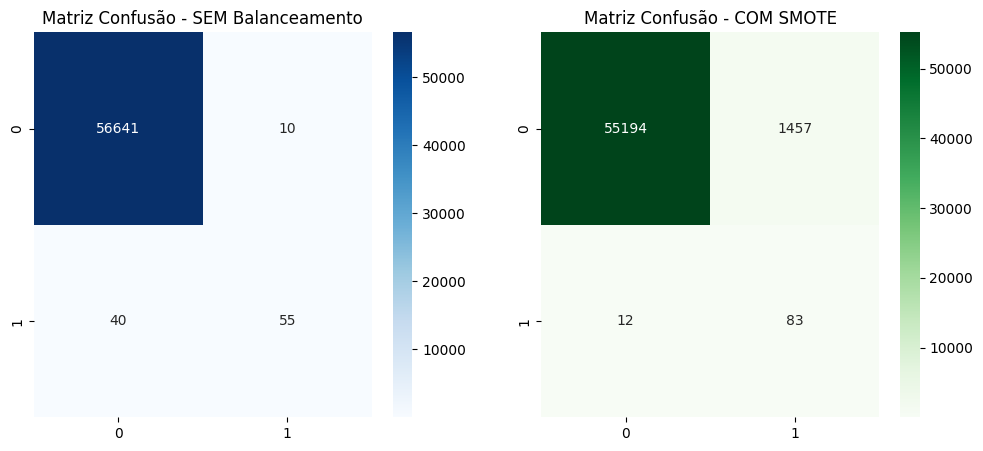

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Modelo A: Treinado com dados DESBALANCEADOS (O jeito "errado")
print("--- MODELO A: Sem Balanceamento ---")
model_a = LogisticRegression(max_iter=1000)
model_a.fit(X_train, y_train)
y_pred_a = model_a.predict(X_test)

# Mostra o relatório (Foque na linha '1' coluna 'recall')
print(classification_report(y_test, y_pred_a))


# Modelo B: Treinado com SMOTE (O jeito "certo")
print("\n--- MODELO B: Com Balanceamento (SMOTE) ---")
model_b = LogisticRegression(max_iter=1000)
model_b.fit(X_train_resampled, y_train_resampled)
y_pred_b = model_b.predict(X_test)

# Mostra o relatório
print(classification_report(y_test, y_pred_b))

# Matriz de Confusão Visual
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_a), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz Confusão - SEM Balanceamento")

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_b), annot=True, fmt='d', cmap='Greens')
plt.title("Matriz Confusão - COM SMOTE")
plt.show()